# Выбор локации для скважины

# Описание задачи

Выбор локации для скважины

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль, а также проанализируйте возможную прибыль и риски техникой Bootstrap.

Шаги для выбора локации:

В избранном регионе ищут месторождения, для каждого определяют значения признаков; Строят модель и оценивают объём запасов; Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины; Прибыль равна суммарной прибыли отобранных месторождений.

# План работы

1. Загрузка и подготовка данных
2. Обучение и проверка модели
3. Подготовка к расчёту прибыли
4. Расчёт прибыли и рисков
5. Вывод

# Описание данных

Данные геологоразведки трёх регионов находятся в файлах:
1. `/datasets/geo_data_0.csv`
2. `/datasets/geo_data_1.csv`
3. `/datasets/geo_data_2.csv`

Каждый датасет содержит следующие признаки:
- `id`: уникальный идентификатор скважины
- `f0`, `f1`, `f2`: три признака точек. Значение каждого признака неважно, однако они имеют существенное значение для анализа данных.
- `product`: объём запасов в скважине (в тысячах баррелей)


# 1  Загрузка и подготовка данных

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy import stats as st

In [ ]:
# чтение файла данных в датафрейм из папки по умолчанию и из рабочей директории
try:
    df_1 = pd.read_csv('/datasets/geo_data_0.csv')
    df_2 = pd.read_csv('/datasets/geo_data_1.csv')
    df_3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df_1 = pd.read_csv('/content/geo_data_0.csv')
    df_2 = pd.read_csv('/content/geo_data_1.csv')
    df_3 = pd.read_csv('/content/geo_data_2.csv')

In [ ]:
df_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [ ]:
df_2

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [ ]:
df_3

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неизвестно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей). product-целевой признак

Таким образом сказать имеет ли место быть аномалии или выборосы не представляется возможным, ведь мы не знаем какого рода атрибуты заложены в признаки f0, f1, f2.


In [ ]:
df_1.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [ ]:
df_2.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

In [ ]:
df_3.isna().mean()

id         0.0
f0         0.0
f1         0.0
f2         0.0
product    0.0
dtype: float64

в данных пропусков нет

In [ ]:
df_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [ ]:
df_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [ ]:
df_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


среднее значение product от 69 до 95, учтем это в дальнейшем анализе

In [ ]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [ ]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [ ]:
df_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


выявленна корелляция f2 и product, в двар раза больше на втором дата сете


In [ ]:
print('Количество дубликатов объектов по региону 1:', df_1.duplicated().sum())
print('Количество дубликатов объектов по региону 1:', df_2.duplicated().sum())
print('Количество дубликатов объектов по региону 1:', df_3.duplicated().sum())

Количество дубликатов объектов по региону 1: 0
Количество дубликатов объектов по региону 1: 0
Количество дубликатов объектов по региону 1: 0


Дубликатов не обнаружено

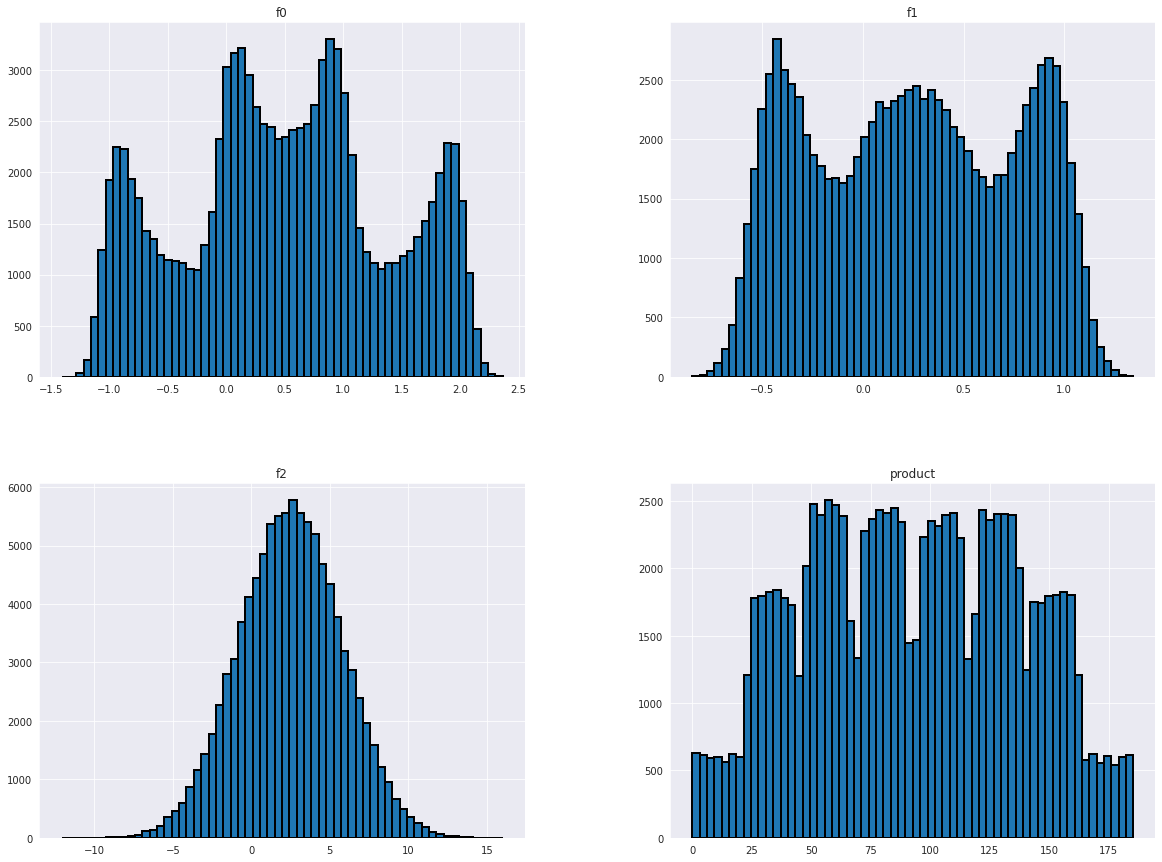

In [ ]:
df_1.hist(bins=60, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

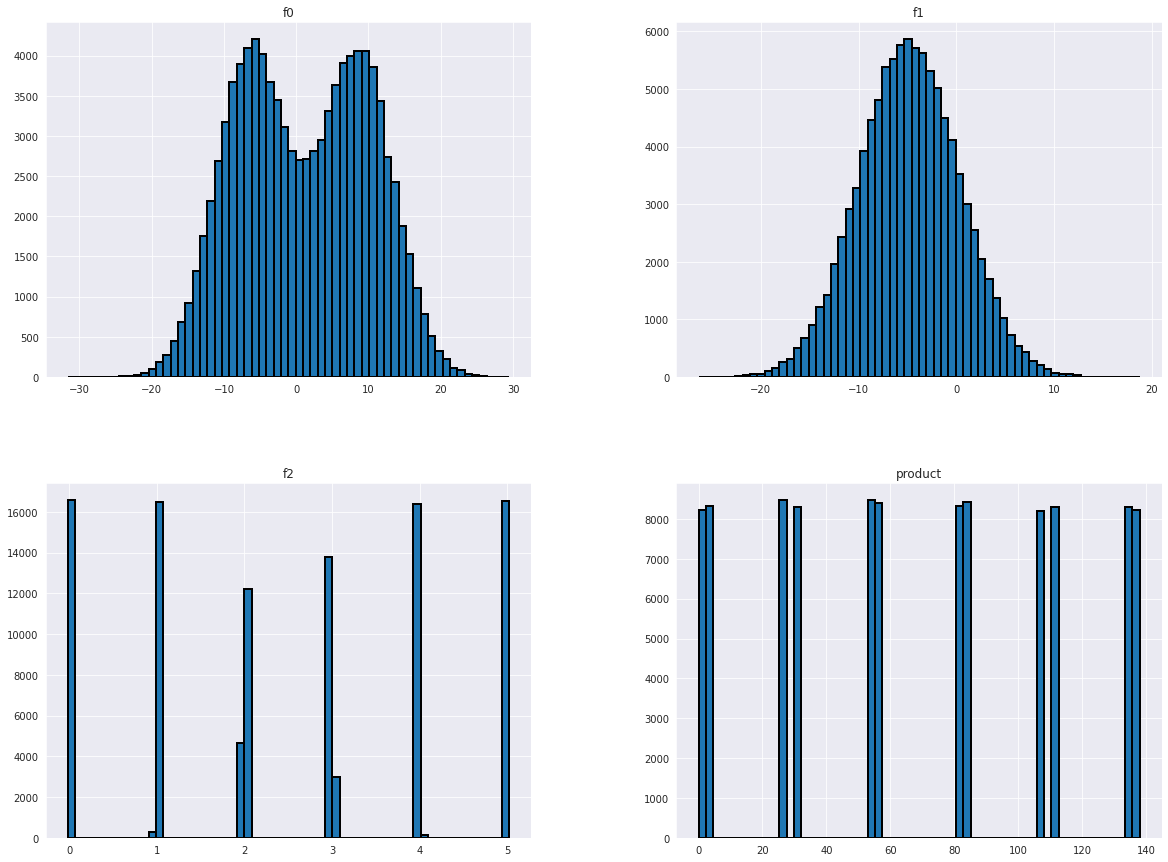

In [ ]:
df_2.hist(bins=60, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

Значения признаков f2 и product у второго региона довольна подозрительно, скорее всего это аномалия в данных

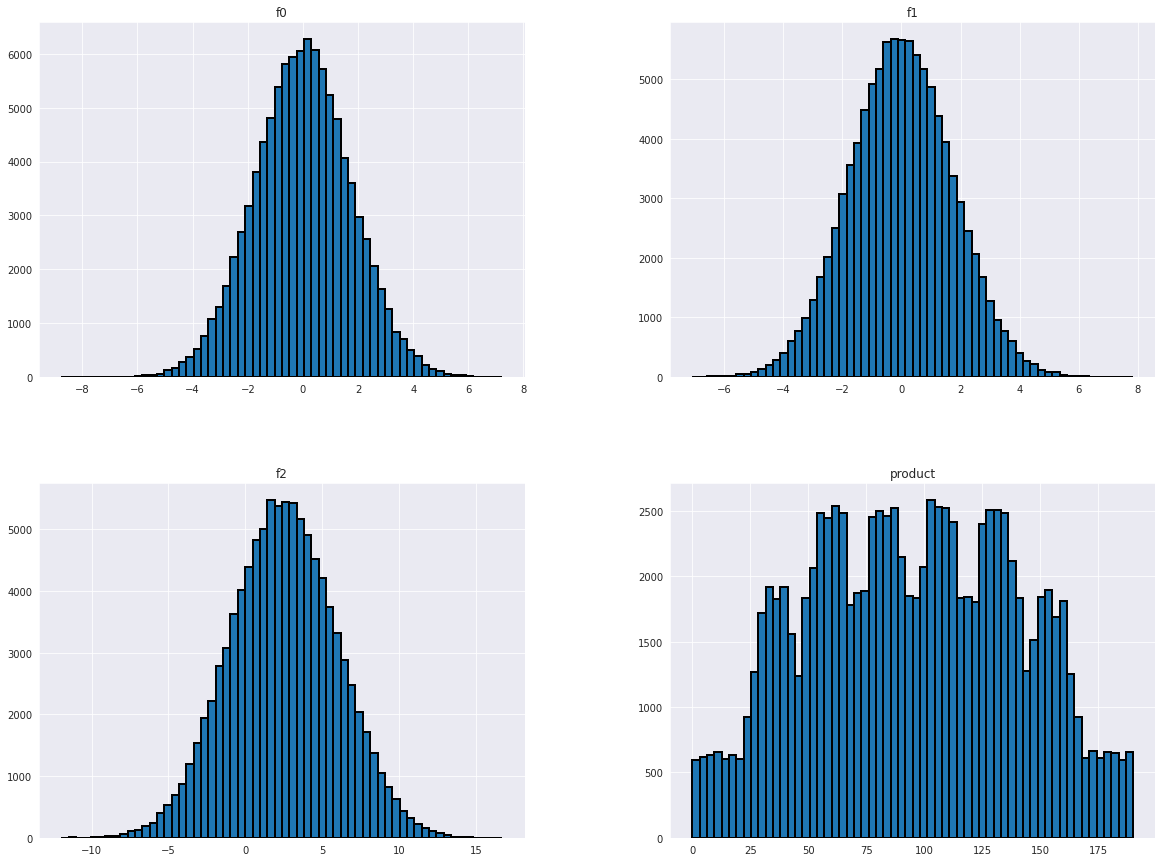

In [ ]:
df_3.hist(bins=60, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

id в обучении моделей можно не использовать, так как он не несет полезной нагрузки и значимости

In [ ]:
df_1 = df_1.drop(['id'], axis=1)
df_2 = df_2.drop(['id'], axis=1)
df_3 = df_3.drop(['id'], axis=1)

Вывод

В целом данные не плохие(нет пропусков и дубликатов) но подозрительно выглядит второй регион. В то же время столбцы f невозможно однозначно интерпретировать.id удалил так как он не информативен.

# 2  Обучение и проверка модели

1 Регион

In [ ]:
# выделение обучающей и тестовой выборкок \random_state=42\
train_1, test_1 = train_test_split(df_1,train_size=0.75,random_state=14)
valid_1, test_1 = train_test_split(test_1,train_size=0.5,random_state=14)

In [ ]:
features_train_1 = train_1.drop(['product'], axis=1)
target_train_1 = train_1['product']
features_valid_1 = valid_1.drop(['product'], axis=1)
target_valid_1 = valid_1['product']
features_test_1 = test_1.drop(['product'], axis=1)
target_test_1 = test_1['product']

In [ ]:
# произведем масштабирование
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_1[numeric])

features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])
features_test_1[numeric] = scaler.transform(features_test_1[numeric])

In [ ]:
results = []

In [ ]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) # обучим модель

predictions_valid_1 = model_1.predict(features_valid_1) # найдём предсказания на валидационной выборке

mean_1 = predictions_valid_1.mean()
rmse_1 =  mean_squared_error(target_valid_1, predictions_valid_1)**0.5
results.append((mean_1, rmse_1, df_1['product'].mean()))
print("Cредний запас предсказанного сырья:", mean_1)
print("RMSE модели линейной регрессии на валидационной выборке:", rmse_1)

Cредний запас предсказанного сырья: 92.40902907077555
RMSE модели линейной регрессии на валидационной выборке: 37.68490339371666


2 Регион

In [ ]:
# выделение обучающей и тестовой выборкок \random_state=42\
train_2, test_2 = train_test_split(df_2,train_size=0.75,random_state=14)
valid_2, test_2 = train_test_split(test_2,train_size=0.5,random_state=14)

In [ ]:
features_train_2 = train_2.drop(['product'], axis=1)
target_train_2 = train_2['product']
features_valid_2 = valid_2.drop(['product'], axis=1)
target_valid_2 = valid_2['product']
features_test_2 = test_2.drop(['product'], axis=1)
target_test_2 = test_2['product']

In [ ]:
# произведем масштабирование
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_2[numeric])

features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])
features_test_2[numeric] = scaler.transform(features_test_2[numeric])

In [ ]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) # обучим модель

predictions_valid_2 = model_2.predict(features_valid_2) # найдём предсказания на валидационной выборке

mean_2 = predictions_valid_2.mean()
rmse_2 =  mean_squared_error(target_valid_2, predictions_valid_2)**0.5
results.append((mean_2, rmse_2, df_2['product'].mean()))
print("Cредний запас предсказанного сырья:", mean_2)
print("RMSE модели линейной регрессии на валидационной выборке:", rmse_2)

Cредний запас предсказанного сырья: 68.65494241925025
RMSE модели линейной регрессии на валидационной выборке: 0.8982978242023886


3 регион

In [ ]:
# выделение обучающей и тестовой выборкок \random_state=42\
train_3, test_3 = train_test_split(df_3,train_size=0.75,random_state=14)
valid_3, test_3 = train_test_split(test_3,train_size=0.5,random_state=14)

In [ ]:
features_train_3 = train_3.drop(['product'], axis=1)
target_train_3 = train_3['product']
features_valid_3 = valid_3.drop(['product'], axis=1)
target_valid_3 = valid_3['product']
features_test_3 = test_3.drop(['product'], axis=1)
target_test_3 = test_3['product']

In [ ]:
# произведем масштабирование
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_3[numeric])

features_train_3[numeric] = scaler.transform(features_train_3[numeric])
features_valid_3[numeric] = scaler.transform(features_valid_3[numeric])
features_test_3[numeric] = scaler.transform(features_test_3[numeric])

In [ ]:
model_3 = LinearRegression()
model_3.fit(features_train_3, target_train_3) # обучим модель

predictions_valid_3 = model_3.predict(features_valid_3) # найдём предсказания на валидационной выборке

mean_3 = predictions_valid_3.mean()
rmse_3 =  mean_squared_error(target_valid_3, predictions_valid_3)**0.5
results.append((mean_3, rmse_3, df_3['product'].mean()))
print("Cредний запас предсказанного сырья:", mean_3)
print("RMSE модели линейной регрессии на валидационной выборке:", rmse_3)

Cредний запас предсказанного сырья: 94.92037544355902
RMSE модели линейной регрессии на валидационной выборке: 39.885238155294616


Лучший регион по показателям 3 с предсказанием 95. Аномальный регион 2

# 3  Подготовка к расчёту прибыли

In [ ]:
BUDGET = 10*10**9
POINTS_OF_BELL = 200
PRICE_OF_1000 = 450*10**3
WELL_PRICE = int(BUDGET / POINTS_OF_BELL)

In [ ]:
oil_deposits = WELL_PRICE / PRICE_OF_1000

print('Минимальный запас нефти на скважину, тыс. бар.:', (oil_deposits))

Минимальный запас нефти на скважину, тыс. бар.: 111.11111111111111


In [ ]:
summary = pd.DataFrame(results, columns=['mean', 'rmse', 'df_mean_pred'])
summary

,mean,rmse,df_mean_pred
0,92.409029,37.684903,92.500
1,68.654942,0.898298,68.825
2,94.920375,39.885238,95.000


In [ ]:
summary ['difference'] = summary['mean'] - oil_deposits
summary

,mean,rmse,df_mean_pred,difference
0,92.409029,37.684903,92.500,-18.702082
1,68.654942,0.898298,68.825,-42.456169
2,94.920375,39.885238,95.000,-16.190736


Получается что в среднем все скважины убыточны, но это "средняя температура по больнице, посмотрим что будет если выбрать 200 лучших скважин

In [ ]:
def revenue(target_valid, predicted_valid, count):
        POINTS_OF_BELL = 200 # Количество скважин
        PRICE_OF_1000 = 450000 # Цена за 1000 баррелей
        BUDGET = 10000000000 # Бюджет
        target = pd.Series(target_valid,index=target_valid.index)
        probabilities = pd.Series(predicted_valid,index=target.index)
        probs_sorted = probabilities.sort_values(ascending=False)
        selected = target.loc[probs_sorted.index][:count]
        return PRICE_OF_1000 * selected.sum() - BUDGET

In [ ]:
print('Доход 1 региона: ', revenue(target_valid_1, predictions_valid_1, 200))

Доход 1 региона:  3098925866.2668133


In [ ]:
print('Доход 2 региона: ', revenue(target_valid_2, predictions_valid_2, 200))

Доход 2 региона:  2415086696.681511


In [ ]:
print('Доход 3 региона: ',revenue(target_valid_3, predictions_valid_3, 200))

Доход 3 региона:  2128793888.4553223


Доход 1 региона:  3,098 млрд.

Доход 2 региона:  2,415 млрд.

Доход 3 региона:  2,128 млрд.

По размеру доходов первый регион лучше всех

# 4 Расчёт прибыли и рисков

In [ ]:
state = np.random.RandomState(42)

values = []
for i in range(1000):
    target_subsample = target_valid_1.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    valid_subsample = predictions_valid_1[target_subsample.index]

    values.append(revenue(target_subsample, valid_subsample, POINTS_OF_BELL))

values = pd.Series(values)
lower = values.quantile(0.025)

upper = values.quantile(0.975)
mean = values.mean()
print("1 Регион")
print("Средняя прибыль", mean)
print("95%-квантиль:", lower, ':', upper)

risk = ((values <0).mean()*100, "%")
print("Риск убытков", risk)

1 Регион
Средняя прибыль 537363941.493056
95%-квантиль: 3086405.113390883 : 1080405965.7918396
Риск убытков (2.5, '%')


In [ ]:
state = np.random.RandomState(42)

values = []
for i in range(1000):
    target_subsample = target_valid_2.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    valid_subsample = predictions_valid_2[target_subsample.index]

    values.append(revenue(target_subsample, valid_subsample, POINTS_OF_BELL))

values = pd.Series(values)
lower = values.quantile(0.025)

upper = values.quantile(0.975)
mean = values.mean()
print("2 Регион")
print("Средняя прибыль", mean)
print("95%-квантиль:", lower, ':', upper)

risk = ((values <0).mean()*100, "%")
print("Риск убытков", risk)

2 Регион
Средняя прибыль 511207587.61397666
95%-квантиль: 64544116.983282425 : 1004224986.3008244
Риск убытков (1.3, '%')


In [ ]:
state = np.random.RandomState(42)

values = []
for i in range(1000):
    target_subsample = target_valid_3.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
    valid_subsample = predictions_valid_3[target_subsample.index]

    values.append(revenue(target_subsample, valid_subsample, POINTS_OF_BELL))

values = pd.Series(values)
lower = values.quantile(0.025)

upper = values.quantile(0.975)
mean = values.mean()
print("2 Регион")
print("Средняя прибыль", mean)
print("95%-квантиль:", lower, ':', upper)

risk = ((values <0).mean()*100, "%")
print("Риск убытков", risk)

2 Регион
Средняя прибыль 391172993.71889305
95%-квантиль: -154443830.3080733 : 939269478.7424115
Риск убытков (8.0, '%')


1 Регион
Средняя прибыль 0,54 млрд.
95%-квантиль: 3086405.113390883 : 1080405965.7918396
Риск убытков (2.5, '%')

2 Регион
Средняя прибыль 0,511 млрд.
95%-квантиль: 64544116.983282425 : 1004224986.3008244
Риск убытков (1.3, '%')


2 Регион
Средняя прибыль 0,39 млрд.
95%-квантиль: -154443830.3080733 : 939269478.7424115
Риск убытков (8.0, '%')


# Вывод

Были даны пробы нефти в трёх регионах: в каждом 10 000 месторождений. Мы построили модель машинного обучения на основе линейной регрессии, с помощью которой мы определили самый предположительно прибыльный регион.

Самую высокую прибыль показал РЕГИОН 1 - 3,098 млрд рублей прогнозируемых.

При проверке техникой Bootsrap хорошие результаты показали 1 и 2 регионы, но т.к. данные со второго региона выглядят нестандартно, предалается их уточнить у заказчика.

По сововкупности проведенных исследований рекомендуется к разработке 1 регион